# Dogs vs. Cats Image Classification Using Convolutional Neural Networks (InceptionResNetV2)¶

Download the Dogs vs Cats image catalog from Kaggle here : https://www.kaggle.com/competitions/dogs-vs-cats/data

Follow the steps below:

## Dataset

Unzip the dataset in your downloads folder as shown in the image below:

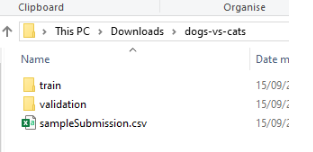

## Imports

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import shutil
import random

In [5]:
data_dir = 'C:\\Users\\jordi\\Downloads\\dogs-vs-cats'
train_dir = os.path.join(data_dir, 'Train')
validation_dir = os.path.join(data_dir, 'Validation')

## Copy images to a local directory

In [6]:
# local directory `data`
base_dir = 'data'  
train_dir_new = os.path.join(base_dir, 'train')
os.makedirs(train_dir_new, exist_ok=True)

train_cats_dir = os.path.join(train_dir_new, 'cats')
train_dogs_dir = os.path.join(train_dir_new, 'dogs')
os.makedirs(train_cats_dir, exist_ok=True)
os.makedirs(train_dogs_dir, exist_ok=True)

all_images = os.listdir(train_dir)

cat_images = [img for img in all_images if img.startswith('cat')]
dog_images = [img for img in all_images if img.startswith('dog')]

def copy_images(image_list, source_dir, dest_dir):
    for img in image_list:
        src = os.path.join(source_dir, img)
        dst = os.path.join(dest_dir, img)
        shutil.copyfile(src, dst)

copy_images(cat_images, train_dir, train_cats_dir)
copy_images(dog_images, train_dir, train_dogs_dir)

## Geneare Training and Validation data split 70/30

In [8]:
train_cats, val_cats = train_test_split(os.listdir(train_cats_dir), test_size=0.3, random_state=42)
train_dogs, val_dogs = train_test_split(os.listdir(train_dogs_dir), test_size=0.3, random_state=42)

validation_dir_new = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir_new, exist_ok=True)
validation_cats_dir = os.path.join(validation_dir_new, 'cats')
validation_dogs_dir = os.path.join(validation_dir_new, 'dogs')
os.makedirs(validation_cats_dir, exist_ok=True)
os.makedirs(validation_dogs_dir, exist_ok=True)

def move_images(image_list, source_dir, dest_dir):
    for img in image_list:
        src = os.path.join(source_dir, img)
        dst = os.path.join(dest_dir, img)
        shutil.move(src, dst)

move_images(val_cats, train_cats_dir, validation_cats_dir)
move_images(val_dogs, train_dogs_dir, validation_dogs_dir)